## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


you have panel data also where it is 2 rows from the same year 
to handle this data you just generate a new variable to represent it 
see below:
each column has a variable and feature is about the info in the model but variable and feature can be used interchangablly 

In [10]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute (this is the specific aspect of the viasualization like the exis or the titles or the color or the figure)_

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [15]:
# Example 1: The distribution of heart rate

In [17]:
# Example 2: some plots heart rate vs. something 
            #1. chose something I belive there will be an effect 
            #2. choose something give me a trend in the figure 

In [19]:
# Example 3: 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


<function matplotlib.pyplot.show(close=None, block=None)>

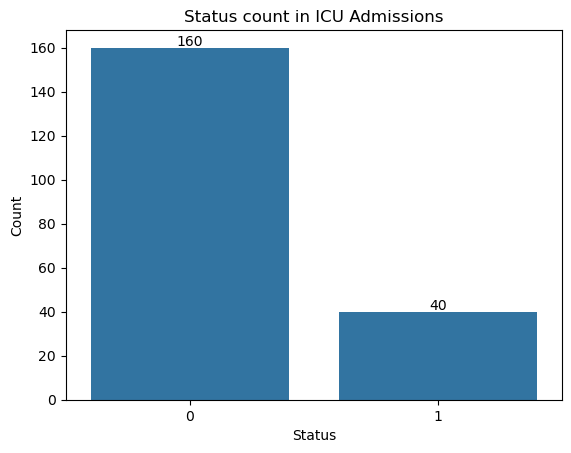

In [29]:
sns.countplot(x='Status', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title("Status count in ICU Admissions")

status_counts = df['Status'].value_counts()

for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha='center')
plt.show
          

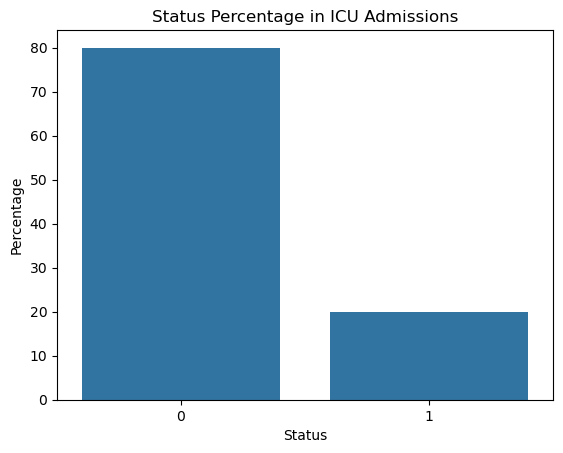

In [39]:
status_counts = df['Status'].value_counts(normalize = True)*100  #you are just making them percentages by multiplying by 100
status_counts

sns.barplot(x=status_counts.index, y=status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Status Percentage in ICU Admissions')
plt.show()

##### What to write about a bar plot

- First sentence should be what the plot is about. EX: 
- Want to report the percentage/count value for each group. EX: 
- Whether there is a clear difference between the groups. EX: 


The figure is about the number of peoople that survived an ICU Admissions. Status '0' means the patient has survived in the ICU while status '1' means the patient died. Anong the 200 patients there are 160 (80%) of them survived while 40 (20%) of them died. it is clear we have more people that survived than died in the data. 

#### One continous: histogram/density plot/boxplot

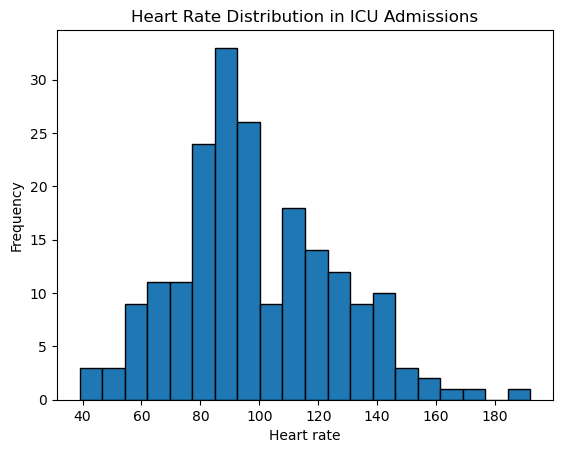

In [53]:
plt.hist(df['HeartRate'], bins=20, edgecolor='black')
plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()
#the bins changes the shape 

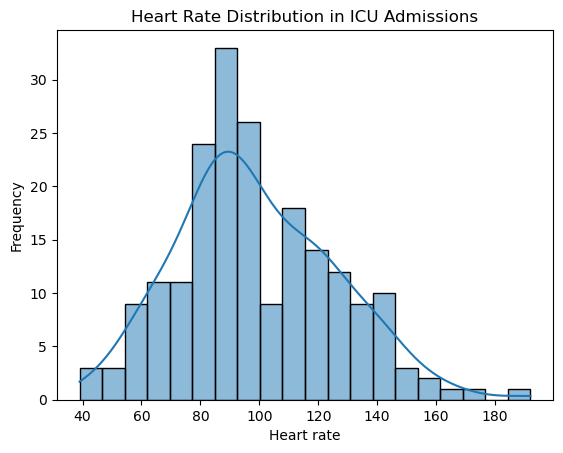

In [57]:
sns.histplot(df['HeartRate'], bins=20, edgecolor='black', kde=True)
plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()
#the bins changes the shape 

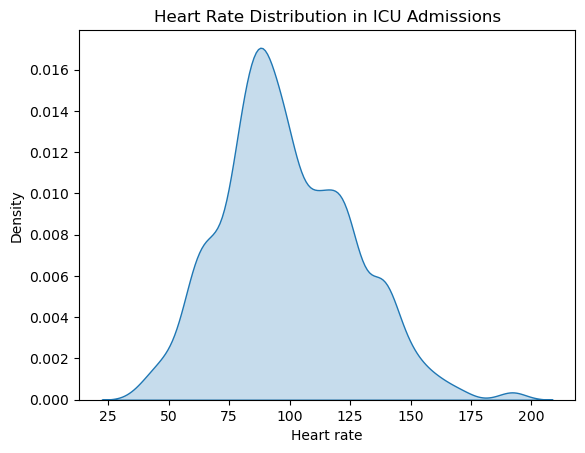

In [63]:
sns.kdeplot(df['HeartRate'], fill=True, bw_adjust=0.6)
plt.xlabel('Heart rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

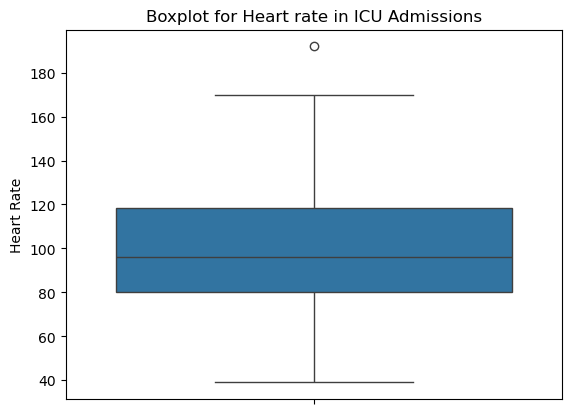

In [71]:
sns.boxplot(y='HeartRate', data = df)
plt.ylabel('Heart Rate')
plt.title('Boxplot for Heart rate in ICU Admissions')
plt.show()

In [73]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasize on the distribution (shape) of the data 
- Box emphasizes the statistics of the data (median, IQR)
- The key thing is Boxplots cannot catch the shape information, like the bi-mode
- Histograms need to have a bin number while density plots need to have a bandwidth 
- if you have multiple groups, boxplot and density lines will be preferred since it is easier to place them side by side 

##### Difference between histogram and bar plot

- Histogram is for the numerical variable whhile the bar plot is for the categorical one.
- Histogram is almost always vertical while bar plots can be horizontal 
- Histograms usually do no have spaces between bars while bar plots can have
- Histogram's bar cannot change the order but for a bar plot you can 


##### What to write about a histogram/density plot

- What the plot is about?
- Shape(skewness and mode)
- Potential ooutlier
- Majority of the data (typical value: mean +- the SD)

EX: This is a histogram for the heart rate distribution in ICU Admissions. The distribution ahs a uni-mide shape and it is slightly skewed to the right, which means it may have a potential outlier with a large value. The typical value is within the range 98.9 $\pm$ 28.6

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

##### What to write about a box plot

- What the plot is about?
- Can also talk about the skewness but not the shape
- Potential outlier 
- Majority of the data (IQR)

Ex: The figure is the boxplot for the heart rate distribution in ICU Admissions. The distrbuton is slightly skewed to the right with a potential outlier on the large value. The IQR range is from 80-118.25.

#### Two continous: scatter plot

Text(0, 0.5, 'Heart Rate')

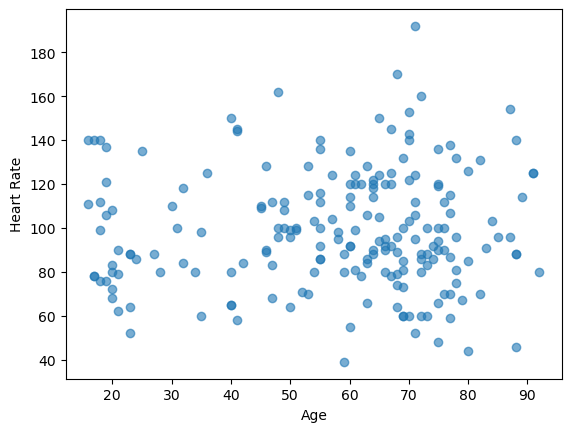

In [93]:
plt.scatter(df['Age'], df['HeartRate'], alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
#alpha helps you see the plots

##### What to write about a scatter plot

- What is the plot about?
- Trend (linear or non-linear)
- Potential outliers or clusters

ex: The figure is a scatterplot between age and heart rate in ICU Admissions. There is no clear linear or nonlinear trend in the data ansd there is no clear potential outlier. There might be a cluster for the age from 60 to 80 and heart rate around 100. 

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

##### What to write about a side-by-side boxplot or density plot

- 
- 


#### Two categorical: side-by-side bar plot

##### What to write about a side-by-side bar plot

- 

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [94]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?